In [18]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns


In [ ]:
# Téléchargement et chargement des données
from ucimlrepo import fetch_ucirepo #Ne pas oublier de faire télécharger le packagage avec !pipinstall

# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
# get features and target
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
data = pd.concat([X, y], axis=1)
data.head()



,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


# EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


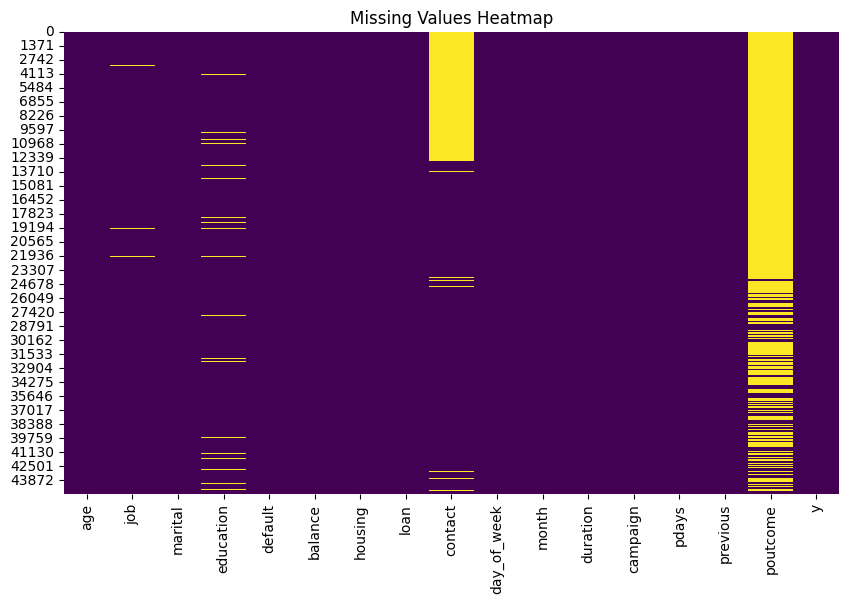

Missing Rate (%):
 age             0.000000
job             0.637013
marital         0.000000
education       4.107407
default         0.000000
balance         0.000000
housing         0.000000
loan            0.000000
contact        28.798301
day_of_week     0.000000
month           0.000000
duration        0.000000
campaign        0.000000
pdays           0.000000
previous        0.000000
poutcome       81.747805
y               0.000000
dtype: float64
Columns dropped (>25% missing): ['contact', 'poutcome']


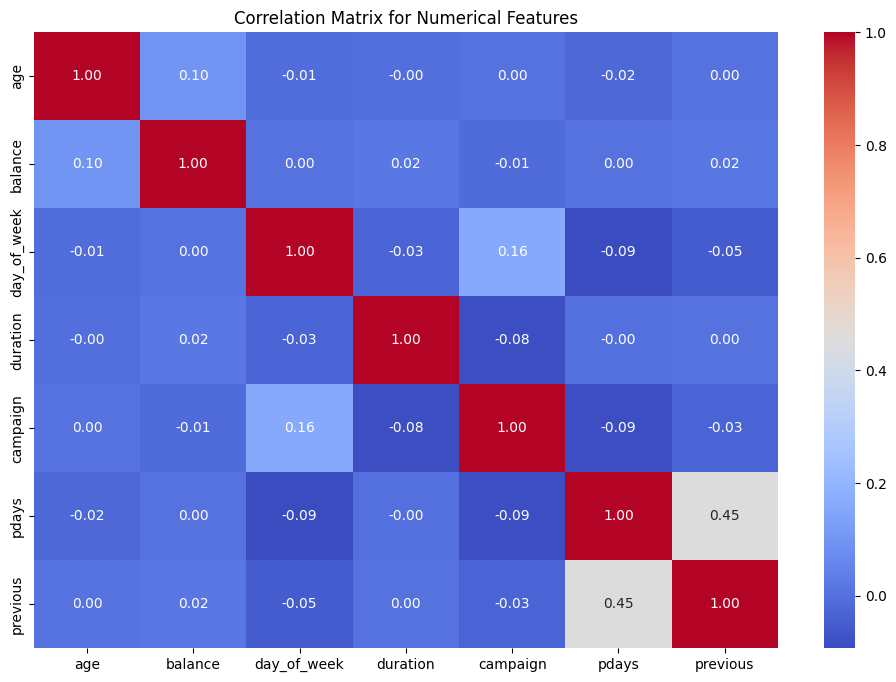

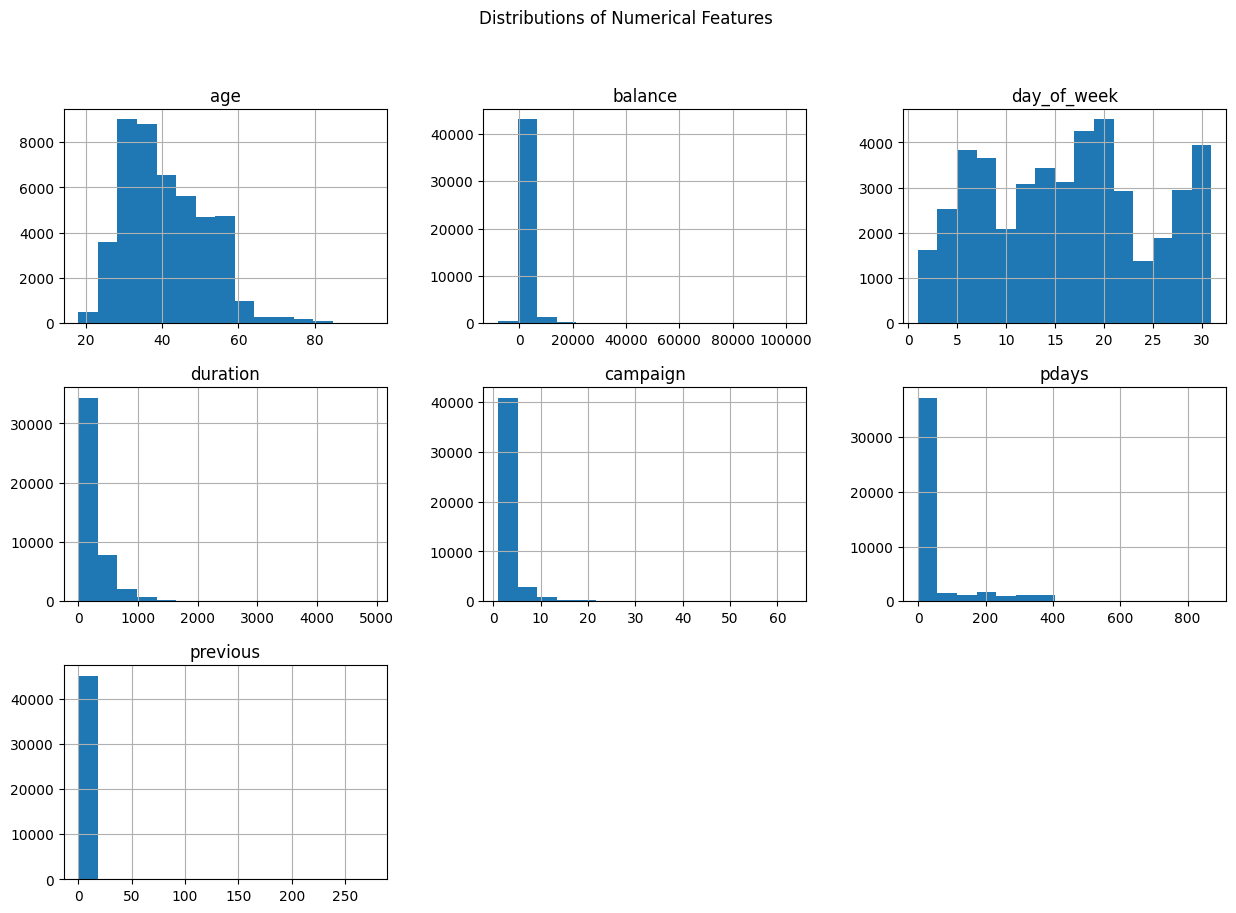

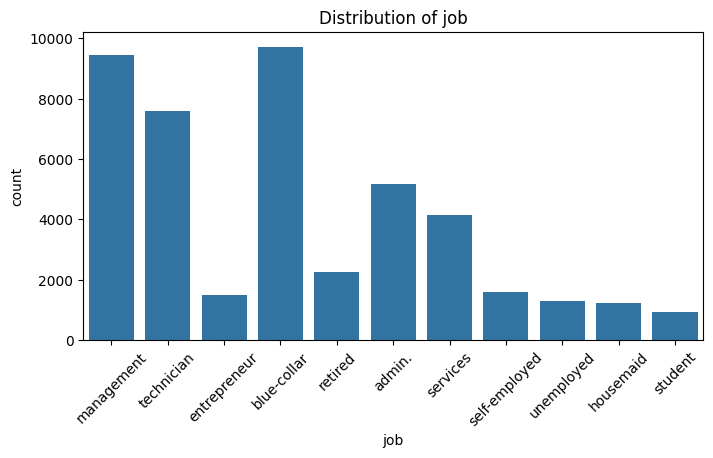

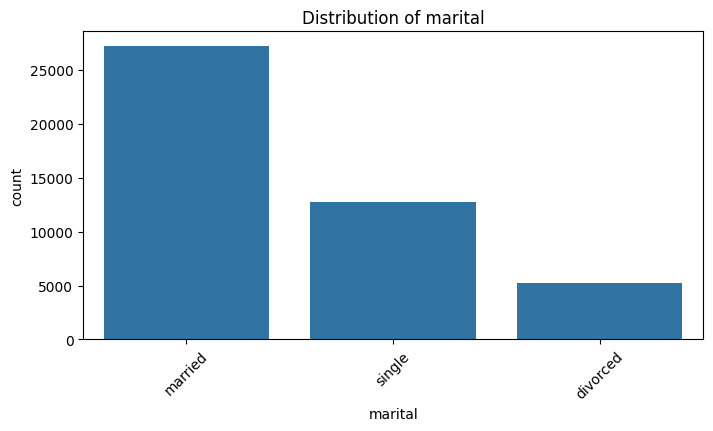

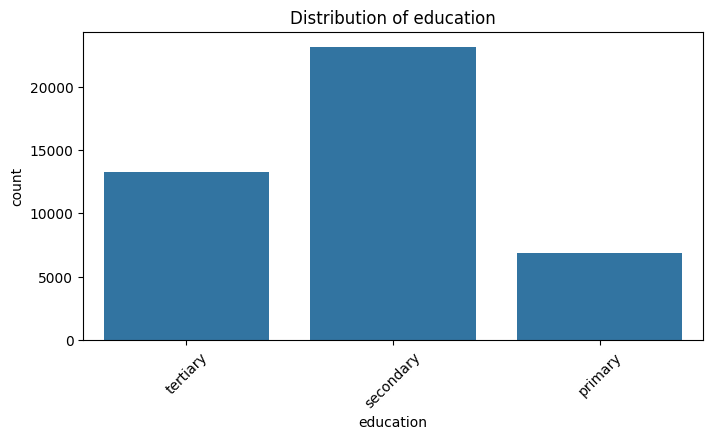

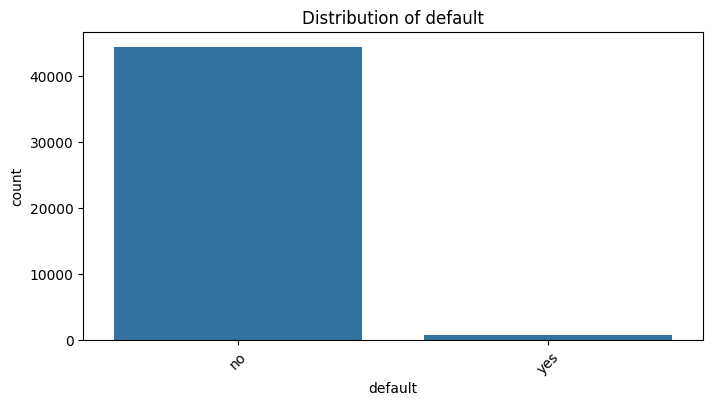

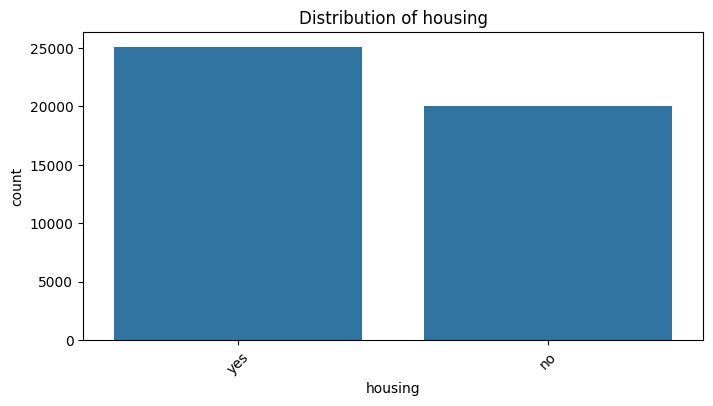

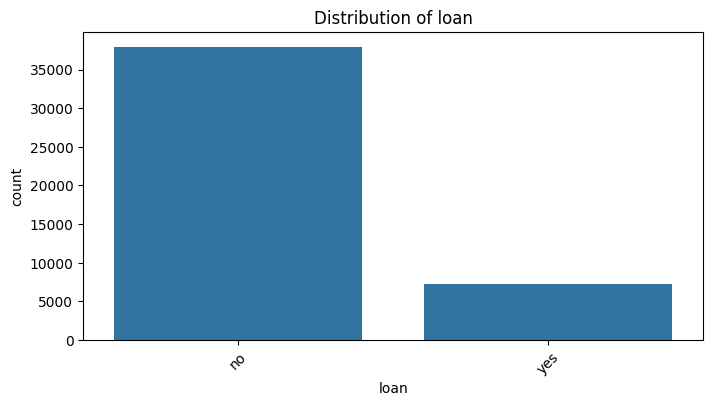

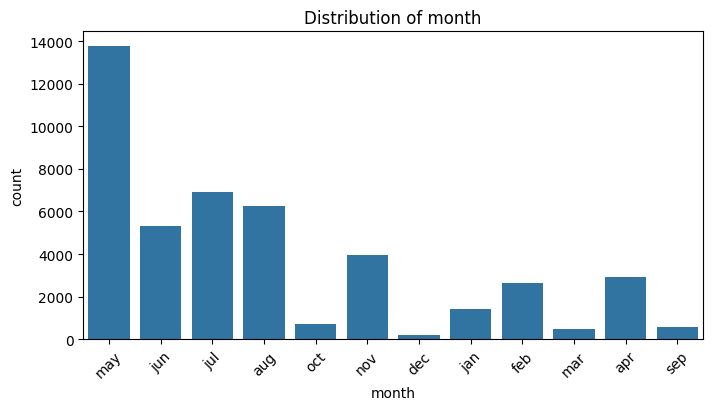

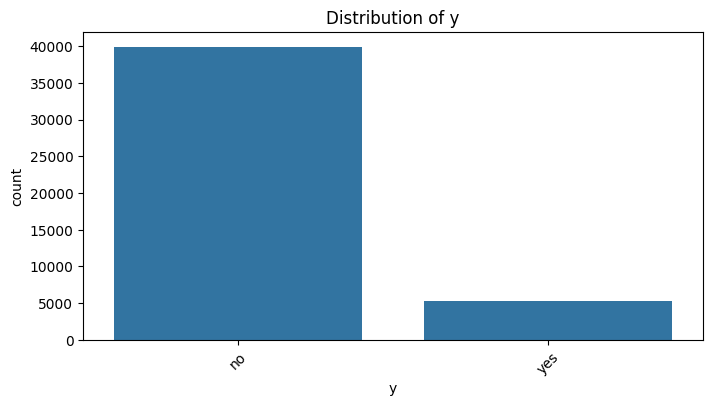

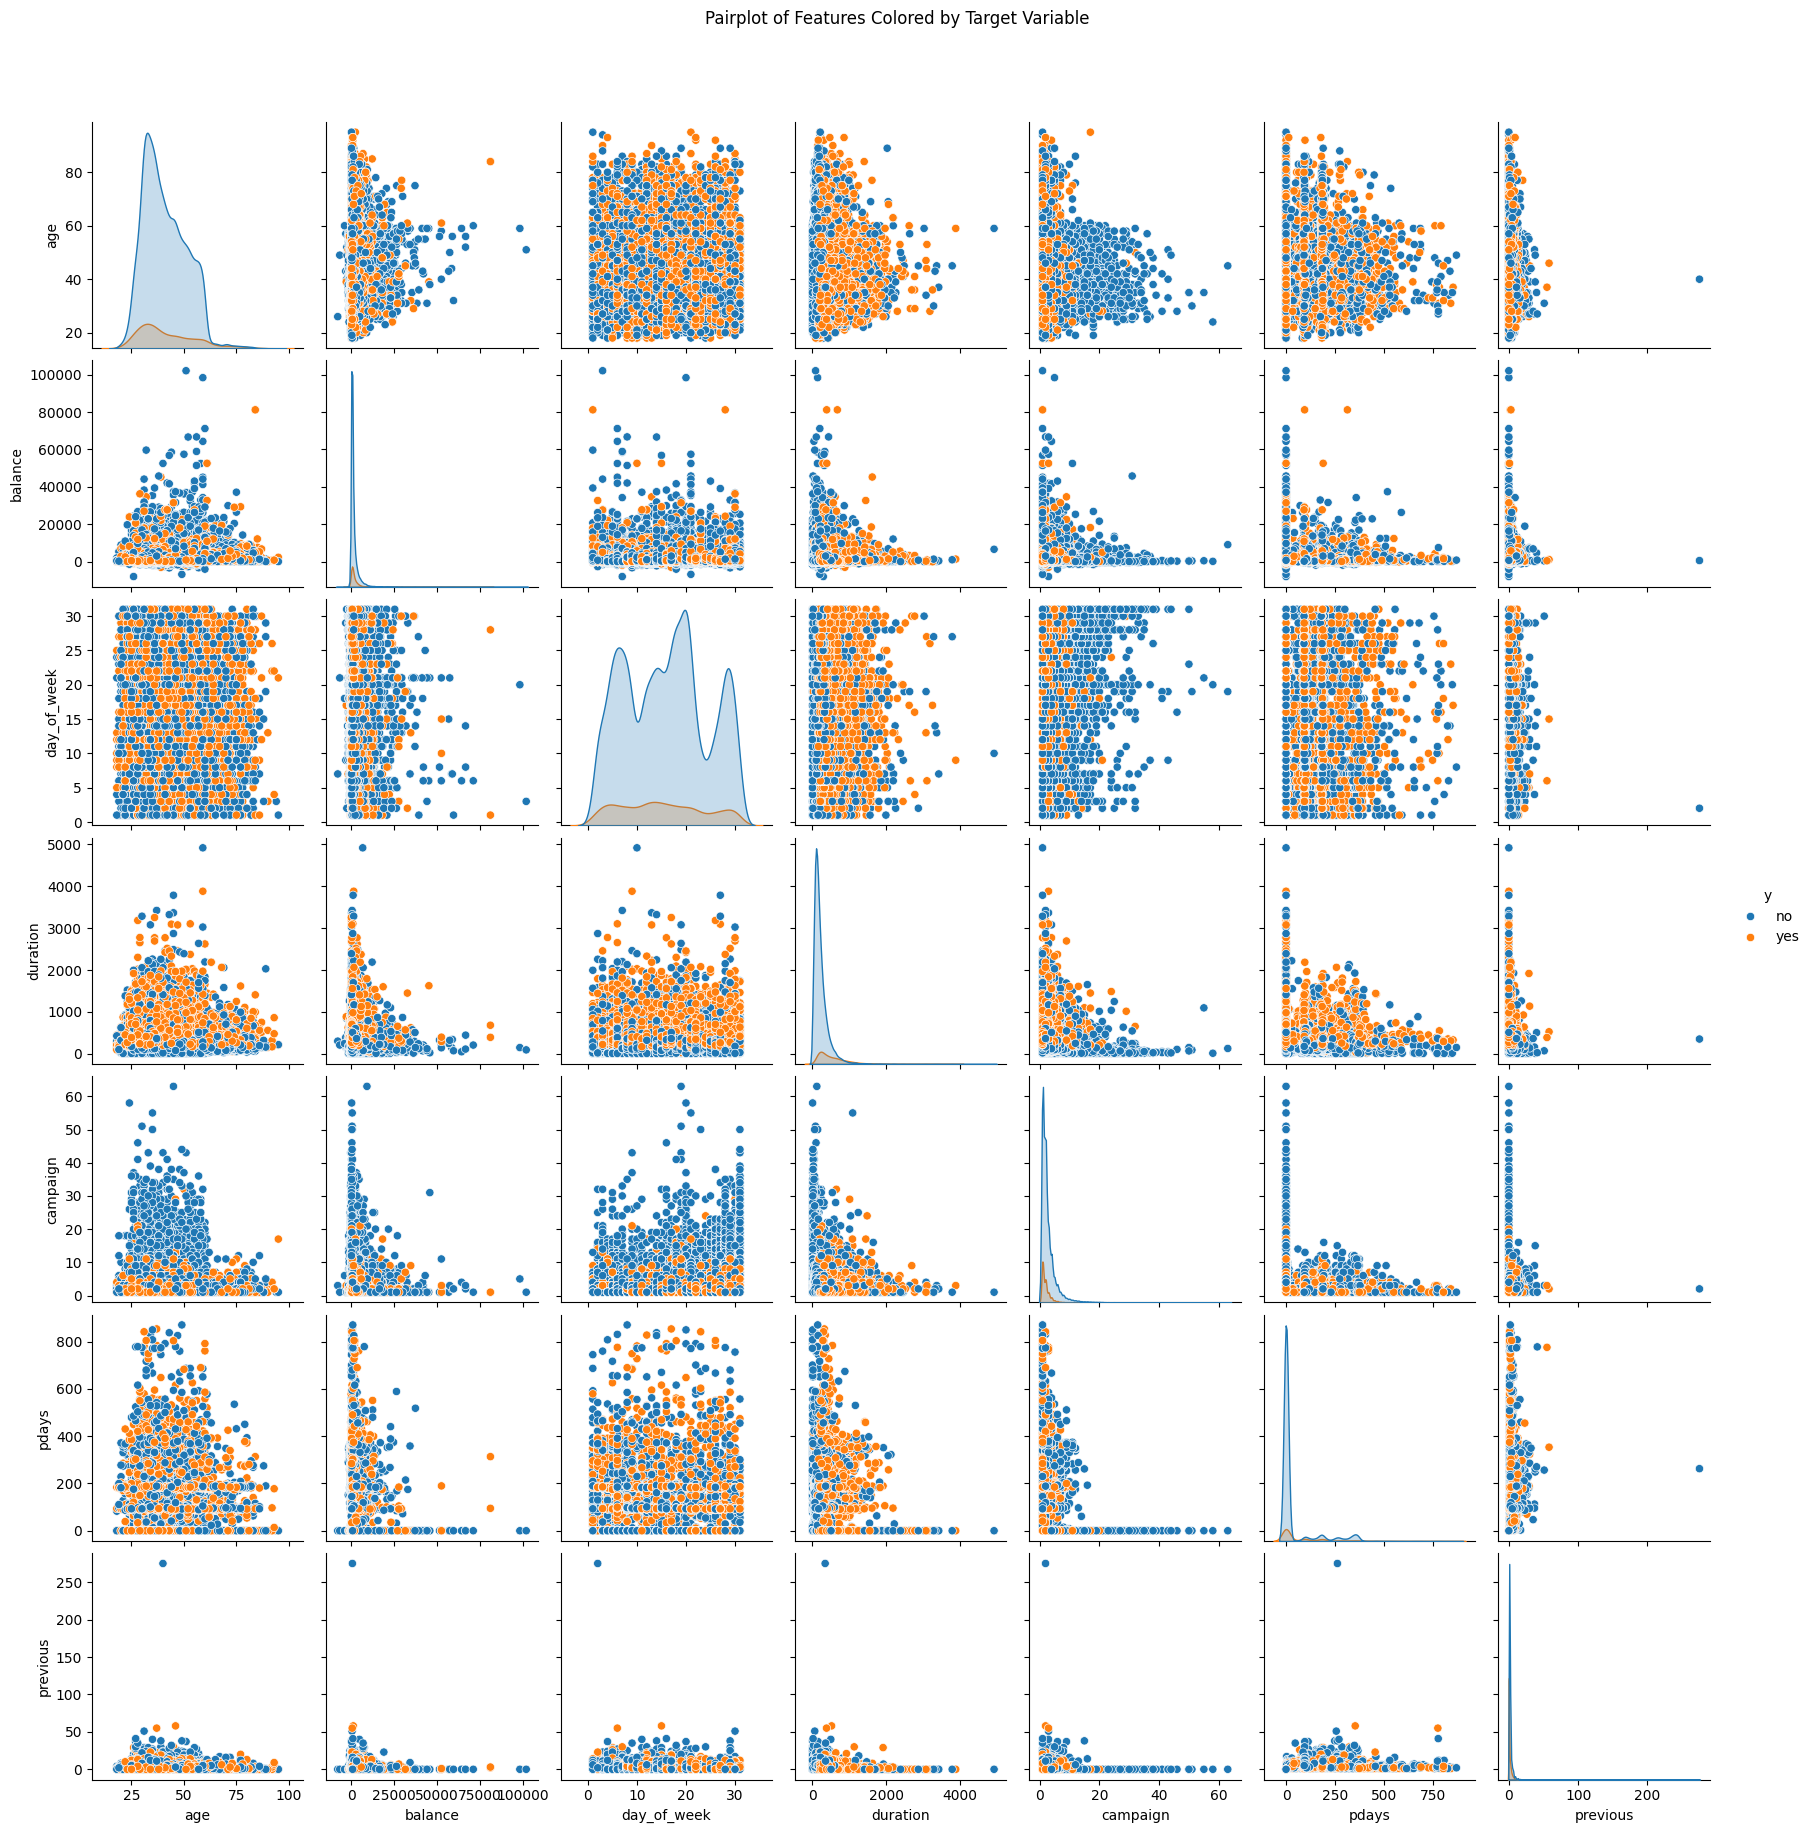

In [20]:
# view dataset info
data.info()
data.describe()
data.isnull().sum()


# Analyse des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(data.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Calcule de missing rate pour chaque colonne
missing_rate = data.isnull().mean() * 100
print("Missing Rate (%):\n", missing_rate)

# supprimer les variables avec plus de 25% de valeurs manquantes
threshold = 25
cols_to_drop = missing_rate[missing_rate > threshold].index
data = data.drop(columns=cols_to_drop)
print(f"Columns dropped (>{threshold}% missing): {list(cols_to_drop)}")

# Correlation matrix for numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
corr_matrix = data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

# visualisation des distributions des variables numériques
data[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distributions of Numerical Features')
plt.show()

# visualisation des variables catégorielles
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
    
# vision globale du dataset
sns.pairplot(data, hue='y')
plt.suptitle('Pairplot of Features Colored by Target Variable', y=1.05)
plt.show()






# Prepropressing

In [24]:
# pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Séparation des caractéristiques et de la cible
X = data.drop('y', axis=1)
y = data['y']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Prétraitement des données
numerical_features = X.select_dtypes(include=[ 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
# Création du pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
# Prétraitement des données d'entraînement et de test
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
y_train = y_train.map({'yes': 1, 'no': 0}).values
y_test = y_test.map({'yes': 1, 'no': 0}).values





--------Random Forest Performance -------
Confusion Matrix:
[[7813  172]
 [ 916  142]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      7985
           1       0.45      0.13      0.21      1058

    accuracy                           0.88      9043
   macro avg       0.67      0.56      0.57      9043
weighted avg       0.84      0.88      0.85      9043



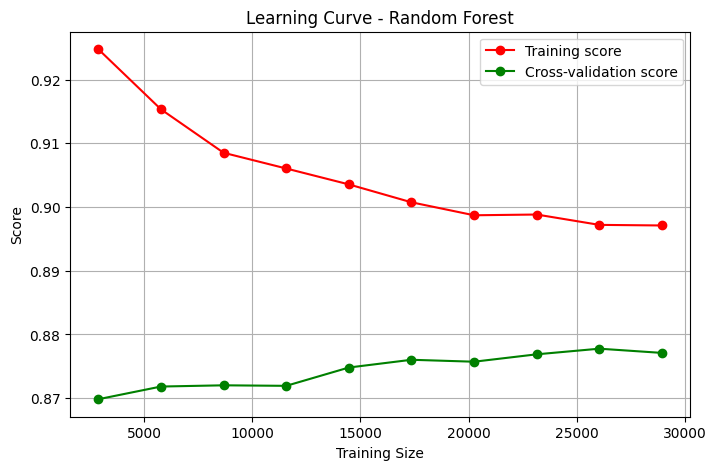

C:\Users\DUNAND TRESOR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [00:47:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--------XGBoost Performance -------
Confusion Matrix:
[[7860  125]
 [ 926  132]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      7985
           1       0.51      0.12      0.20      1058

    accuracy                           0.88      9043
   macro avg       0.70      0.55      0.57      9043
weighted avg       0.85      0.88      0.85      9043



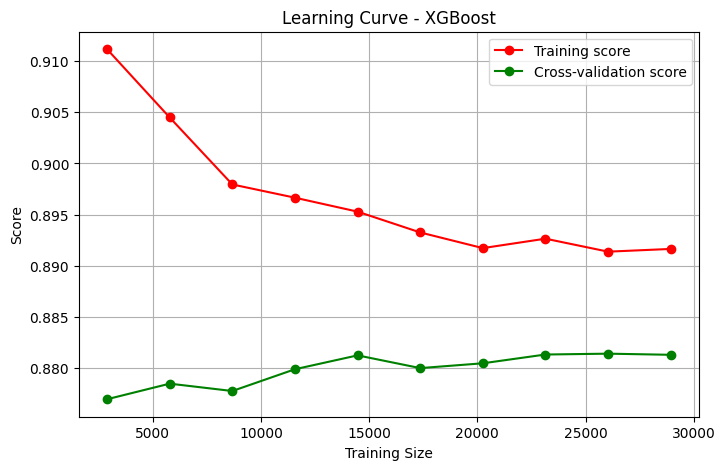

[LightGBM] [Info] Number of positive: 4231, number of negative: 31937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.715182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116982 -> initscore=-2.021327
[LightGBM] [Info] Start training from score -2.021327


C:\Users\DUNAND TRESOR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--------LightGBM Performance -------
Confusion Matrix:
[[7897   88]
 [ 963   95]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7985
           1       0.52      0.09      0.15      1058

    accuracy                           0.88      9043
   macro avg       0.71      0.54      0.55      9043
weighted avg       0.85      0.88      0.85      9043



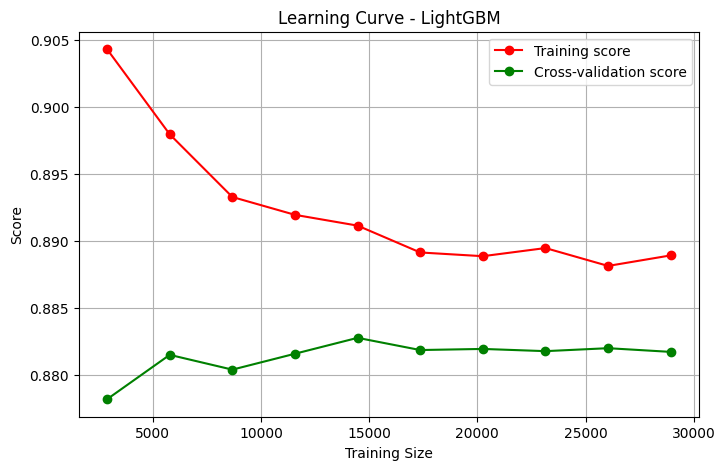

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Fonction d'entraînement et d'évaluation

def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    """
    Entraîne un modèle, évalue la performance, affiche matrice de confusion, classification report et learning curve.
    """
    # Entraînement
    model.fit(X_train, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test)
    
    # Évaluation
    print(f"\n--------{model_name} Performance -------")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.title(f'Learning Curve - {model_name}')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# Définition des modèles

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
    "LightGBM": LGBMClassifier(random_state=42, n_jobs=-1)
}


# Entraînement et évaluation

for name, model in models.items():
    train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name=name)




